# Code Challenge - URL Category Prediction
***
*Author: Miguel Ángel Guzmán Sánchez*
***
Contact regarding the code: mikeguzman1294@gmail.com
***

This notebook solves a URL Category Prediction task given 1 tabular dataset.

The solution follows a multiclass classification approach.

This notebook is divided in 6 main sections.

1.   **Environment Setup**
2.   **Exploratory Data Analysis**
3.   **Data Preprocessing**
4.   **Feature Engineering**
5.   **Classification Modelling**
6.   **Concluding Remarks**

A debrief on the entire project intuition, results and discussion is to be found in the Concluding Remarks.

A useful introductory resource:

* [Mapping Explanation](https://www.youtube.com/watch?v=XuRM4HRNYZA&t=2s)

## Environment Setup

### Import Libraries

General Use Libraries

In [1]:
# Import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Scikit-Learn Libraries

In [2]:
# Data Preprocessing Tools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
# Predictive Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Selection

from sklearn.model_selection import GridSearchCV

In [4]:
# Performance Metrics

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

NLP Libraries

In [5]:
# Regular Expressions & NLP Tools

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\653211\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import the Data

Read the dataset file and convert it to a Pandas Dataframe.

*dataset.csv* → **DataFrame : raw_df**

In [6]:
# Convert the raw data into a Pandas Dataframe

raw_df = pd.read_csv('dataset.csv', index_col=0)

## Exploratory Data Analysis

Explore the first 10 instances of the raw data.

In [7]:
# Check the head as a sanity check of correct loading of the data
raw_df.head(10) # 50

,url,prefix,category_name
0,https://www.1001pneus.fr/sales/order/view/orde...,www.1001pneus.fr,other
1,https://www.1001pneus.fr/multishipping/checkou...,www.1001pneus.fr,checkout
2,https://www.1001pneus.fr/marquage-pneu-sigles?...,www.1001pneus.fr,other
3,https://www.1001pneus.fr/pneus-auto?diameter=1...,www.1001pneus.fr,search
4,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category
5,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category
6,https://www.1001pneus.fr/bridgestone-potenza-s...,www.1001pneus.fr,product
7,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category
8,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category
9,https://www.1001pneus.fr/continental-vanco-cam...,www.1001pneus.fr,product


In [8]:
# Give a check to the tail as well
raw_df.tail(10)

,url,prefix,category_name
54471,https://www.zoro.com/search?amp%3Bcategoryl1=T...,www.zoro.com,search
54472,"https://www.zoro.com/search?categoryl1=Gloves,...",www.zoro.com,search
54473,https://www.zoro.com/search?page=2&q=plug%20wr...,www.zoro.com,search
54474,https://www.zoro.com/?id=Header&smtrctid=15242...,www.zoro.com,home
54475,NaN,www.zoro.com,category
54476,https://www.zoro.com/?origin=defaultbehavior&s...,www.zoro.com,home
54477,https://www.zoro.com/paint-mixers/c/5724/?gcli...,www.zoro.com,category
54478,NaN,NaN,search
54479,https://www.zoro.com/welding-accessories/c/638...,www.zoro.com,category
54480,"https://www.zoro.com/search?categoryl1=Gloves,...",www.zoro.com,search


Get an overall insight on the dataframe content.

In [9]:
# Get the shape of the dataframe
print(f'Dataset shape:\n{raw_df.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{raw_df.columns}\n')

# Get the overall description of the dataset with the data types
print('Dataset general information:')
raw_df.info()

# Get description of attributes
print(f'\nFeatures insight:\n{raw_df.describe(include = object).transpose()}')

Dataset shape:
(54481, 3)

Dataset attributes:
Index(['url', 'prefix', 'category_name'], dtype='object')

Dataset general information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54481 entries, 0 to 54480
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            53940 non-null  object
 1   prefix         53938 non-null  object
 2   category_name  53944 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

Features insight:
               count unique  \
url            53940  53673   
prefix         53938    452   
category_name  53944     17   

                                                             top   freq  
url            https://www.feelunique.com/brands/charlotte-ti...      2  
prefix                                      www.cortinadecor.com    491  
category_name                                            product  20741  


Check the unique labels of the dependent variable.

In [10]:
raw_df.category_name.unique()

array(['other', 'checkout', 'search', 'category', 'product', 'home',
       'my_account', 'hah? something went wrong!!', 'confirmation', nan,
       'cart', 'help_support', 'store_locator', 'information_legals',
       'press_news', 'form', 'brand_image', 'favorites_wishlist'],
      dtype=object)

Plot the label distribution of the categorical variable to be predicted.

<AxesSubplot:>

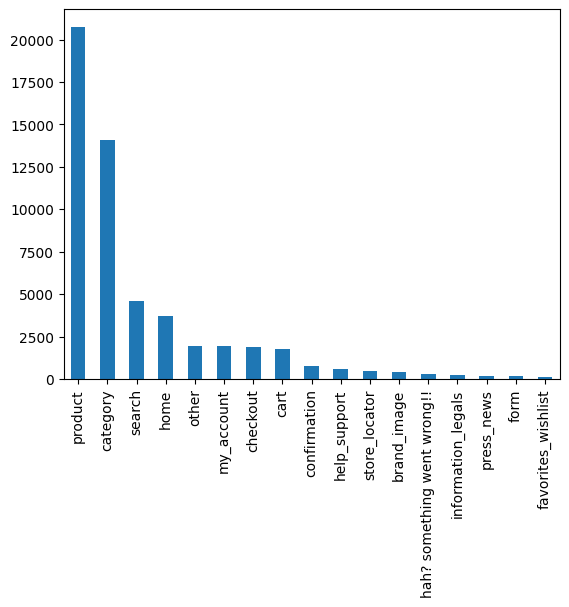

In [11]:
raw_df['category_name'].value_counts(normalize = False).plot.bar()

We can clearly see and **unbalanced class** distribution. We will have to take that into account.

## Data Preprocessing

Create copies fo the raw data before making transformations.

In [12]:
# Make a copy of the raw datasets to keep the original information untouched
df = raw_df.copy()

### Duplicated Instances

Check the number of duplicated rows in the DataFrame.

In [13]:
# Print the number of duplicated rows
print(f'The number of duplicated rows is {df.duplicated().sum()} out of {df.shape[0]} rows.')

The number of duplicated rows is 176 out of 54481 rows.


Drop duplicated rows in the DataFrame.

In [14]:
# keep = 'first' : Drops duplicates except for the first occurrence.
# inplace = True: Modify the DataFrame rather than creating a new one.

# Drop duplicated rows
df.drop_duplicates(keep='first', inplace=True)

Re-check the number of duplicated rows in the DataFrame.

In [15]:
# Print the number of duplicated rows
print(f'The number of duplicated rows is {df.duplicated().sum()} out of {df.shape[0]} rows.')

The number of duplicated rows is 0 out of 54305 rows.


### Missing Values

Do a direct call for printing missing values.

In [16]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{(df.isnull().sum() / len(df)) * 100}\n')

print(f'Number of Null Values per Feature\n{df.isnull().sum()}')

Percentage of Null Values per Feature
url              0.672130
prefix           0.999908
category_name    0.988859
dtype: float64

Number of Null Values per Feature
url              365
prefix           543
category_name    537
dtype: int64


For any of the columns, none of missing values percentage surpasses 1%. This is a very low ratio, good news. The absence of any prefix value is irrelevant in the presence of the URL feature since that information can be extracted from the URL. It is also intuitive to think that a prefix information should be irrelevant in the absence of a URL since each domain (corresponding to an online store host name) can potentially present all the possible categories.

Consequently, training a predictor to find a relationship between a host name and a category can be misleading and problematic. To cite an example, let's imagine that there is a host name that can have all the possible page categories but its training samples only have one or very few category types available, if the predictor uses the host name as a feature it may be biased to associate the delivered category samples to a given host name.

Let's filter the DataFrame checking only for missing values for the URL and labels now.

In [17]:
# Get number of rows without url or label
no_url_label = df[['url', 'category_name']].isna().any(axis=1).sum()
print(f'Number of Rows with any kind of missing value: {df.isna().any(axis=1).sum()}\n')
print(f'Number of Rows with either a missing URL or label: {no_url_label}\n')
print(f'Percentage of Rows with either a missing URL or label: {(no_url_label / len(df))*100}\n')

# Filter the DataFrame for correctness
df[df[['url', 'category_name']].isna().any(axis=1)]

Number of Rows with any kind of missing value: 1429

Number of Rows with either a missing URL or label: 899

Percentage of Rows with either a missing URL or label: 1.6554645060307522



,url,prefix,category_name
19,NaN,www.1001pneus.fr,product
99,https://www.1001pneus.fr/insa-turbo-ranger-245...,www.1001pneus.fr,NaN
108,NaN,www.1001pneus.fr,category
145,https://www.1001pneus.fr/customer/address/?||c...,www.1001pneus.fr,NaN
192,https://www.1001pneus.fr/?||currentStore<Frenc...,www.1001pneus.fr,NaN
...,...,...,...
54280,NaN,www.zoro.com,search
54305,https://www.zoro.com/oil-dri-maintenance-absor...,www.zoro.com,NaN
54347,NaN,www.zoro.com,category
54435,https://www.zoro.com/advanced-drainage-systems...,www.zoro.com,NaN


The percentage of rows intersecting the missing values of URLs and labels is of 1.65 %, which is still very low.

We will drop all these rows given the previously stated reasons.

In [18]:
# Drop rows with either a missing value of URL or label
#df = df.dropna(subset=['url', 'category_name'])
df.dropna(subset=['url', 'category_name'], inplace=True)
df

,url,prefix,category_name
0,https://www.1001pneus.fr/sales/order/view/orde...,www.1001pneus.fr,other
1,https://www.1001pneus.fr/multishipping/checkou...,www.1001pneus.fr,checkout
2,https://www.1001pneus.fr/marquage-pneu-sigles?...,www.1001pneus.fr,other
3,https://www.1001pneus.fr/pneus-auto?diameter=1...,www.1001pneus.fr,search
4,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category
...,...,...,...
54474,https://www.zoro.com/?id=Header&smtrctid=15242...,www.zoro.com,home
54476,https://www.zoro.com/?origin=defaultbehavior&s...,www.zoro.com,home
54477,https://www.zoro.com/paint-mixers/c/5724/?gcli...,www.zoro.com,category
54479,https://www.zoro.com/welding-accessories/c/638...,www.zoro.com,category


Now we will filter for the remaining rows with missing values.

In [19]:
# Print the number of rows with any missing value after dropping the ones with missing URL or label
print(f'Number of Rows with any kind of missing value: {df.isna().any(axis=1).sum()}\n')

# Get an insight of rows containing missing values - should only be missing prefixes
df[df.isna().any(axis=1)]

Number of Rows with any kind of missing value: 530



,url,prefix,category_name
37,https://www.1001pneus.fr/pneus-auto/pneus-4x4-...,NaN,search
112,https://www.1001pneus.fr/pneus-auto?diameter=1...,NaN,search
171,https://www.1001pneus.fr/pneus-auto?diameter=1...,NaN,search
232,https://www.1001pneus.fr/checkout/cart/?||curr...,NaN,cart
260,https://www.1001pneus.fr/pneus-auto?brand%5B%5...,NaN,search
...,...,...,...
53987,https://www.zennioptical.com/b/teen-guys-glass...,NaN,category
54043,https://www.zennioptical.com/?gclid=CM2Gr7HJlO...,NaN,home
54156,https://www.zennioptical.com/orderGlasses?cs-o...,NaN,cart
54288,https://www.zoro.com/search?q=limited-time%20d...,NaN,search


After dropping the rows with missing URL/label values, we still have 530 rows with missing values corresponding to the rows with missing only the prefix. We **definitely** want to keep these rows. Even though that we won't use the host name as a feature for our predictors, it would be nice to fill that column to have a cleaner DataFrame and to simplify the feature extraction process in the next section.

In [20]:
# We index a sample URL to test a function to fill the missing prefix values
sample_url = df.at[54477, "url"]
print(f'Sample URL:\n{sample_url}')

Sample URL:
https://www.zoro.com/paint-mixers/c/5724/?gclid=bbaf471f1b4d10010ebf272925b0d3a3&gclsrc=3p.ds&msclkid=bbaf471f1b4d10010ebf272925b0d3a3&page=2&utm_campaign=DSA%20Manual&utm_content=Cutting,%20holemaking%20%26%20shaping%20tools&utm_medium=cpc&utm_source=bing&utm_term=Drum%20Mixers||Page Category 1<Paint, Coatings & Supplies~Page Category 2<Painting Supplies and Equipment~Page Category 3<Paint Mixers~Page Type<category


In [21]:
# Extract the path of the URL
prefix = sample_url.split("?")[0].split('://')[1].split('/')[0]
print(f'Prefix:\n{prefix}')

Prefix:
www.zoro.com


We fill all the missing prefixes with the URL data.

In [22]:
# Traverse all dataframes rows and if prefix is missing, extract it from the URL
for index, row in df.iterrows() :
  if pd.isna(row['prefix']) :
    row['prefix'] = row['url'].split("?")[0].split('://')[1].split('/')[0]

As a sanity check, we look for the original number of unique prefixes (excluding NaN) and the unique values of the transformed dataframe without missing values. This way me make sure we did not commit any catastrophic error while parsing and processing the URLs.

In [23]:
print(f'Unique prefixes in raw data {len(raw_df.prefix.unique())-1}')
print(f'Unique prefixes in transformed dataframe with no null values: {len(df.prefix.unique())}')

Unique prefixes in raw data 452
Unique prefixes in transformed dataframe with no null values: 450


It appears that there were some rows containing 2 unique prefixes with no associated couple of (URL, label).

Do a direct call for missing values. There shouldn't be any by now.

In [24]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{(df.isnull().sum() / len(df)) * 100}\n')

print(f'Number of Null Values per Feature\n{df.isnull().sum()}')

Percentage of Null Values per Feature
url              0.0
prefix           0.0
category_name    0.0
dtype: float64

Number of Null Values per Feature
url              0
prefix           0
category_name    0
dtype: int64


## Feature Engineering

### Parse URLs

In this subsection the URLs are parsed in order to extract their components and create features upon them.

The URL format is the following :

`{schema}+{prefix}+{path}?{query}||{custom_variables}`

A more comprehensive schema of a generic URL anatomy is displayed next: (excluding custom variables)

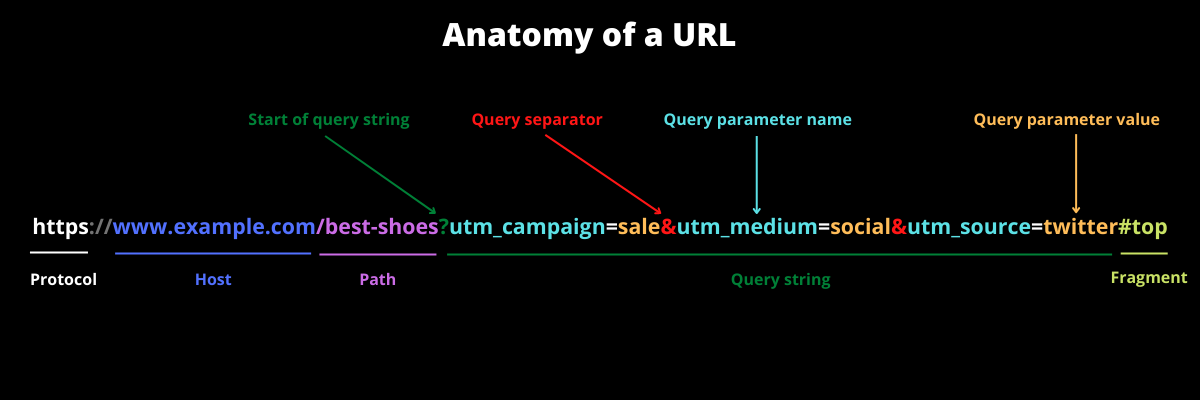

In [25]:
Image("URL.png" , width=640)

**URL Query Operators**

The following signs belong to the syntax of query strings/URL variables.

* '?' : The question mark identifies the beginning of the query string and must be placed at the end of the link, before the contents of the query string.
* & : The ampersand is used before each subsequent query parameter name/value pair in the query string.
* = : The equals sign separates the query parameter name from the value assigned to that name.
* || : This symbol marks the beginning of the custom variables section.
* ~ : This symbol is used before each subsequent custom variable/value pair in the custom variable section.
* < : This sign sign separates the custom variable from the value assigned to that custom variable.

[Source](https://help.alchemer.com/help/url-variables)

Let's get an insight on the features of a sample instance: **URL** & **prefix**

In [26]:
# Select a sample instance URL and prefix from the Dataframe
sample_url, sample_prefix, sample_category = df.loc[54477, ["url", "prefix","category_name"]] # 54477 - 39081

# Print the Features
print(f'Sample URL:\n{sample_url}\n\nSample Prefix (Host):\n{sample_prefix}\n\nSample Category:\n{sample_category}')

Sample URL:
https://www.zoro.com/paint-mixers/c/5724/?gclid=bbaf471f1b4d10010ebf272925b0d3a3&gclsrc=3p.ds&msclkid=bbaf471f1b4d10010ebf272925b0d3a3&page=2&utm_campaign=DSA%20Manual&utm_content=Cutting,%20holemaking%20%26%20shaping%20tools&utm_medium=cpc&utm_source=bing&utm_term=Drum%20Mixers||Page Category 1<Paint, Coatings & Supplies~Page Category 2<Painting Supplies and Equipment~Page Category 3<Paint Mixers~Page Type<category

Sample Prefix (Host):
www.zoro.com

Sample Category:
category


From the sample instance selected above we extract its main sections: **Path**, **Query** string and **Custom Variables** strings

In [27]:
# Extract the path of the URL
path = sample_url.split("||")[0].split("?")[0].split(sample_prefix)[-1]

# Extract the query - ? is used to join since there may be the case that a query string includes this character
query = "?".join(sample_url.split("||")[0].split("?")[1:])

# Extract the custom variables of the URL (right side of custom variable delimiter)
#cvar = sample_url.split("||")[-1]
cvar = "||".join(sample_url.split("||")[1:])

# Print the Components
print(f'Path:\n{path}\n\nQuery:\n{query}\n\nCustom Variables:\n{cvar}')

Path:
/paint-mixers/c/5724/

Query:
gclid=bbaf471f1b4d10010ebf272925b0d3a3&gclsrc=3p.ds&msclkid=bbaf471f1b4d10010ebf272925b0d3a3&page=2&utm_campaign=DSA%20Manual&utm_content=Cutting,%20holemaking%20%26%20shaping%20tools&utm_medium=cpc&utm_source=bing&utm_term=Drum%20Mixers

Custom Variables:
Page Category 1<Paint, Coatings & Supplies~Page Category 2<Painting Supplies and Equipment~Page Category 3<Paint Mixers~Page Type<category


### Parse Main URL Sections

In this sub-section we test component extraction techniques for each of the sections of the URLs. For a path we extract all its levels and for the queries and custom variables we extract both their parameter names and values. This techniques will be useful to define feature engineering functions in the next subsection.

**Path Section**

Extract all path levels.

In [28]:
# Save all the levels of a given path as elements of a list
path_list = path.strip("/").split("/")
path_list

['paint-mixers', 'c', '5724']

**Query Section**

Extract query parameters and associated values as key/value pairs of a data dictionary.

There are some corner cases to consider while extracting query parameters:

* **Case 1**: The query contains a parameter with no associated value.

  *Example*: `cs-popin-add-to-bag`

* **Case 2**: The query contains more than 1 '=' symbol in the body of a value.

  *Example*: `assemblyService=%7B%7D&checkoutId=19f9eecb-e2eb-4225-ab1f-5008b72945d6&deliveryAreaId=90c0cf78-e78b-43ee-8807-fae03b83c4c4&payment=eyJwYXltZW50VHlwZSI6IkFDSV9QQVlQQUwifQ==&paymentContextId=3174a5fa-b9c5-4b91-8c0c-2c42d74d8e92`

* **Case 3**: The query contains an empty pair.

  *Example*: `&_campaign=&gclid=CjwKCAiAyc2BBhAaEiwA44-wW2e0sJKgMQO_wnwHCHPwZu2F9MjnMN1RKrQshif6STFGiqB768l-nhoCAYcQAvD_BwE&gclsrc=aw.ds`

In order to test the parsing of these corner cases we define some synthetic queries based upon real data for testing their coverage. Each synthetic query corresponds to each of the corner cases expressed above.


In [29]:
synth_query_1 = 'cs-popin-add-to-bag'
synth_query_2 = 'assemblyService=%7B%7D&checkoutId=19f9eecb-e2eb-4225-ab1f-5008b72945d6&deliveryAreaId=90c0cf78-e78b-43ee-8807-fae03b83c4c4&payment=eyJwYXltZW50VHlwZSI6IkFDSV9QQVlQQUwifQ==&paymentContextId=3174a5fa-b9c5-4b91-8c0c-2c42d74d8e92'
synth_query_3 = '&_campaign=&gclid=CjwKCAiAyc2BBhAaEiwA44-wW2e0sJKgMQO_wnwHCHPwZu2F9MjnMN1RKrQshif6STFGiqB768l-nhoCAYcQAvD_BwE&gclsrc=aw.ds'

We create an auxiliary function to extract an URL query components given its string expression. We test it against the synthetic test samples representing the corner cases.

In [30]:
def parse_query(query) :

  ###########################################################################################################
  """
      This function receives a URL query string and extracts its parameters and associated values.
      --
      In:
          * query: String containing a full URL query.
      Out:
          * query_dict: Data dictionary containing query parameters and their respective values.
  """
  ###########################################################################################################

  # Initialize query data dictionary
  query_dict = {}

  # There could be the case where the query is an empty string
  if query != "":

    # Remove all empty couples
    k_v = [k_v for k_v in query.split("&") if k_v != ""]
    # If only the parameter name is present, save it and set its value to an empty string
    k_v = [pair.split('=',1) if len(pair.split('=')) > 1 else [pair, ''] for pair in k_v]

    # Create the data dictionary from the key-value list elements
    query_dict = dict(k_v)

  # Return the data dictionary containing the query information
  return query_dict

# Test the function against corner case samples
parse_query(synth_query_2)

{'assemblyService': '%7B%7D',
 'checkoutId': '19f9eecb-e2eb-4225-ab1f-5008b72945d6',
 'deliveryAreaId': '90c0cf78-e78b-43ee-8807-fae03b83c4c4',
 'payment': 'eyJwYXltZW50VHlwZSI6IkFDSV9QQVlQQUwifQ==',
 'paymentContextId': '3174a5fa-b9c5-4b91-8c0c-2c42d74d8e92'}

**Custom Variables Section**

Extract custom variables and associated values as key/value pairs of a data dictionary.

There are some corner cases to consider while extracting custom variable parameters:

* **Case 1**: The query contains more than 1 '<' symbol in the body of a value.

  *Example 1*: `Content Type<ordershippingbillingview1~Date of birth<35-44~LTV<<10~Logged Status<Logged In~Membership Purchase<Yes~Membership level<GBBPMMS1X50~Membership status<Non member~Page Type<Other~Store<BeautyPie UK`

  *Example 2*: `Condition<null~Keyword<nos.com/pl-pl/home~Page Name<Sonos | Bezprzewodowe głośniki i Domowy system dźwiękowy<~Product Availability<null`

In order to test the parsing of these corner cases we define some synthetic custom variable sections based upon real data for testing their coverage. Each synthetic query corresponds to each of the corner cases expressed above.


In [31]:
synth_cvar_1 = 'Content Type<ordershippingbillingview1~Date of birth<35-44~LTV<<10~Logged Status<Logged In~Membership Purchase<Yes~Membership level<GBBPMMS1X50~Membership status<Non member~Page Type<Other~Store<BeautyPie UK'
synth_cvar_2 = 'Condition<null~Keyword<nos.com/pl-pl/home~Page Name<Sonos | Bezprzewodowe głośniki i Domowy system dźwiękowy<~Product Availability<null'

We create an auxiliary function to extract an URL custom variables given its section string expression. We test it against the synthetic test samples representing the corner cases.

In [32]:
def parse_cvar(cvar) :

  ###########################################################################################################
  """
      This function receives a URL custom variables string and extracts its parameters and associated values.
      --
      In:
          * query: String containing a full URL custom variable section.
      Out:
          * query_dict: Data dictionary containing custom variable parameters and their respective values.
  """
  ###########################################################################################################

  # Initialize query data dictionary
  cvar_dict = {}

  # There could be the case where the query is an empty string
  if cvar != "":

    # Remove all empty couples
    k_v = [k_v for k_v in cvar.split("~") if k_v != ""]
    # If only the parameter name is present, save it and set its value to an empty string
    k_v = [pair.split('<',1) if len(pair.split('<')) > 1 else [pair, ''] for pair in k_v]

    # Create the data dictionary from the key-value list elements
    cvar_dict = dict(k_v)

  # Return the data dictionary containing the custom variables information
  return cvar_dict

# Test the function against corner case samples
parse_cvar(synth_cvar_1)

{'Content Type': 'ordershippingbillingview1',
 'Date of birth': '35-44',
 'LTV': '<10',
 'Logged Status': 'Logged In',
 'Membership Purchase': 'Yes',
 'Membership level': 'GBBPMMS1X50',
 'Membership status': 'Non member',
 'Page Type': 'Other',
 'Store': 'BeautyPie UK'}

### Create Section Features

With the functions used to extract URL sections and their components, we will create columns containing this broken-down information. For this we define an auxiliary function that can be used in a DataFrame transformation pipeline.

In [33]:
def create_URL_features(df) :

  ###########################################################################################################
  """
      This function receives a dataframe containg a URL column and adds to it path, query and cvar based features.
      --
      In:
          * df: DataFrame containing a URL column.
      Out:
          * void
  """
  ###########################################################################################################

  # Create lists to store information to be extracted
  paths        = []
  path_counts  = []
  query_keys   = []
  query_values = []
  query_counts = []
  cvar_keys    = []
  cvar_values  = []
  cvar_counts  = []

  # Iterate to get all rows section components information
  for index, row in df.iterrows():

    # Path Features Information

    current_path = row['url'].split("||")[0].split("?")[0].split(row['prefix'])[-1]
    current_path = current_path.strip("/").split("/")
    if current_path[0] == "" :
      path_counts.append(0)
    else :
      path_counts.append(len(current_path))
    current_path = " ".join(current_path)
    paths.append(current_path)

    # Query Features Information

    # Reset current query dictionary each iteration
    current_query_dict = {}
    # Extract query section from URL string
    current_query = "?".join(row['url'].split("||")[0].split("?")[1:])
    # Get all query key-value pairs and store them in a dictionary
    current_query_dict = parse_query(current_query)
    # Add the key-value pairs to their respective list of strings
    current_query_keys = current_query_dict.keys()
    current_query_values = current_query_dict.values()
    query_counts.append(len(current_query_keys))
    current_query_keys = " ".join(current_query_keys)
    query_keys.append(current_query_keys)
    current_query_values = " ".join(current_query_values)
    query_values.append(current_query_values)

    # Custom Variable Features Information

    # Reset current cvar dictionary each iteration
    current_cvar_dict = {}
    # Extract custom variable section from URL string
    current_cvar = "||".join(row['url'].split("||")[1:])
    # Get all custom variable key-value pairs and store them in a dictionary
    current_cvar_dict = parse_cvar(current_cvar)
    # Add the key-value pairs to their respective list of strings
    current_cvar_keys = current_cvar_dict.keys()
    current_cvar_values = current_cvar_dict.values()
    cvar_counts.append(len(current_cvar_keys))
    current_cvar_keys = " ".join(current_cvar_keys)
    cvar_keys.append(current_cvar_keys)
    current_cvar_values = " ".join(current_cvar_values)
    cvar_values.append(current_cvar_values)

  # Create the new columns based on the extracted information
  df['path']         = paths
  df['path_count']   = path_counts
  df['query_keys']   = query_keys
  df['query_values'] = query_values
  df['query_count']  = query_counts
  df['cvar_keys']    = cvar_keys
  df['cvar_values']  = cvar_values
  df['cvar_count']   = cvar_counts

create_URL_features(df)

Let's inspect the dataframe with the engineered features to ensure correctness.

In [34]:
df.head(10)

,url,prefix,category_name,path,path_count,query_keys,query_values,query_count,cvar_keys,cvar_values,cvar_count
0,https://www.1001pneus.fr/sales/order/view/orde...,www.1001pneus.fr,other,sales order view order_id 50621,5,,,0,currentStore ecomm_pagetype visitorECustomer ...,French FR Store View other Oui 2468349 Logged ...,6
1,https://www.1001pneus.fr/multishipping/checkou...,www.1001pneus.fr,checkout,multishipping checkout addresses,3,,,0,currentStore ecomm_pagetype visitorECustomer ...,French FR Store View other Oui 1253593 Logged ...,6
2,https://www.1001pneus.fr/marquage-pneu-sigles?...,www.1001pneus.fr,other,marquage-pneu-sigles,1,,,0,currentStore ecomm_pagetype visitorECustomer ...,French FR Store View other Non 192391 Logged i...,6
3,https://www.1001pneus.fr/pneus-auto?diameter=1...,www.1001pneus.fr,search,pneus-auto,1,diameter height season%5B1%5D width,13 65 4+Saisons 165,4,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto Universe Non 1...,7
4,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category,pneus-auto marques-pneus-auto michelin primacy-4,4,diameter height load_index speed_index width,17 50 93 W 205,5,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/M...,6
5,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category,pneus-auto marques-pneus-auto continental alls...,4,diameter height load_index speed_index width,17 60 96 H 215,5,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/C...,7
6,https://www.1001pneus.fr/bridgestone-potenza-s...,www.1001pneus.fr,product,bridgestone-potenza-s001-225-45-r17-91-y-27747...,1,,,0,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/B...,6
7,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category,pneus-auto marques-pneus-auto uniroyal ms-plus-77,4,,,0,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/U...,6
8,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category,pneus-auto marques-pneus-auto continental wint...,4,utm_campaign utm_medium utm_source,BtoC__Jusqu_140_offerts_chez_Continental__5_ch...,3,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/C...,6
9,https://www.1001pneus.fr/continental-vanco-cam...,www.1001pneus.fr,product,continental-vanco-camper-215-70-r15-109-r-6612-pn,1,,,0,currentStore ecomm_category ecomm_pagetype vis...,French FR Store View Pneus auto/Marques Auto/C...,7


In [35]:
df.tail(10)

,url,prefix,category_name,path,path_count,query_keys,query_values,query_count,cvar_keys,cvar_values,cvar_count
54469,https://www.zoro.com/ergodyne-backpack-blue-po...,www.zoro.com,category,ergodyne-backpack-blue-polyester-5244 i G74068...,4,gclid utm_campaign utm_content utm_medium utm_...,CjwKCAiAyc2BBhAaEiwA44-wW1QuqRuzcNOneSjMM5c7Sy...,5,Page Category 1 Page Category 2 Page Category ...,Facility & Worksite Safety Fire Protection Wil...,4
54470,https://www.zoro.com/search?categoryl1=Fastene...,www.zoro.com,search,search,1,categoryl1 categoryl2 categoryl3 q variants.at...,Fasteners Anchors Wedge%20Anchors 1%2F2%20in,5,Page Category 1 Page Category 2 Page Category ...,Fasteners Anchors Wedge Anchors search,4
54471,https://www.zoro.com/search?amp%3Bcategoryl1=T...,www.zoro.com,search,search,1,amp%3Bcategoryl1 amp%3Bcategoryl2 amp%3Bcatego...,Test%20Instruments%20%26%20Gauges Water%20Qual...,8,Page Category 1 Page Category 2 Page Category ...,Test Instruments & Gauges Water Quality Testin...,4
54472,"https://www.zoro.com/search?categoryl1=Gloves,...",www.zoro.com,search,search,1,categoryl1 page price-max price-min q,"Gloves,%20Eyewear,%20Ear%20Protection,%20Masks...",5,Page Category 1 Page Type,"Gloves, Eyewear, Ear Protection, Masks & Cloth...",2
54473,https://www.zoro.com/search?page=2&q=plug%20wr...,www.zoro.com,search,search,1,page q,2 plug%20wrench,2,Page Type,search,1
54474,https://www.zoro.com/?id=Header&smtrctid=15242...,www.zoro.com,home,,0,id smtrctid utm_campaign utm_content utm_mediu...,Header 152424838 202005_OrderConfirm_Transacti...,6,Page Type,homepage,1
54476,https://www.zoro.com/?origin=defaultbehavior&s...,www.zoro.com,home,,0,origin sitepath whence,defaultbehavior %2Fcheckout%2Flogin.ssp,3,Page Type,homepage,1
54477,https://www.zoro.com/paint-mixers/c/5724/?gcli...,www.zoro.com,category,paint-mixers c 5724,3,gclid gclsrc msclkid page utm_campaign utm_con...,bbaf471f1b4d10010ebf272925b0d3a3 3p.ds bbaf471...,9,Page Category 1 Page Category 2 Page Category ...,"Paint, Coatings & Supplies Painting Supplies a...",4
54479,https://www.zoro.com/welding-accessories/c/638...,www.zoro.com,category,welding-accessories c 6389,3,,,0,Page Category 1 Page Category 2 Page Category ...,Welding & Soldering Equipment & Supplies Weldi...,4
54480,"https://www.zoro.com/search?categoryl1=Gloves,...",www.zoro.com,search,search,1,categoryl1 page price-max price-min q,"Gloves,%20Eyewear,%20Ear%20Protection,%20Masks...",5,Page Category 1 Page Type,"Gloves, Eyewear, Ear Protection, Masks & Cloth...",2


Plot distribution of number of path levels, query parameters and custom variables per category.

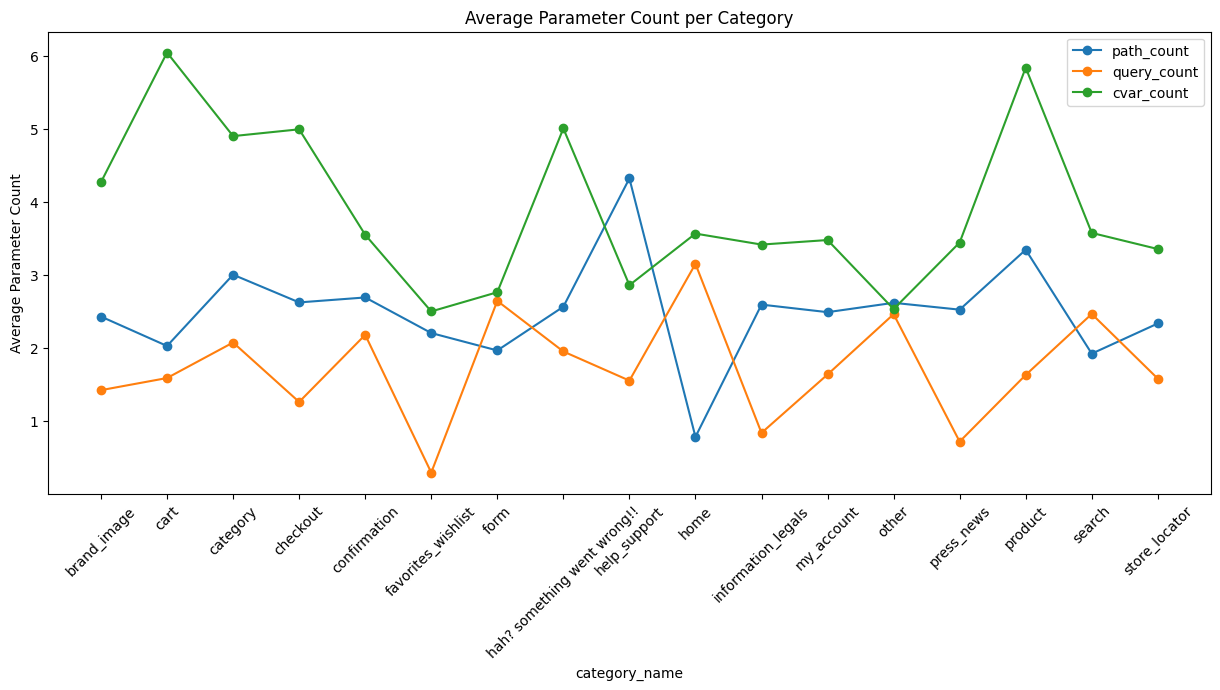

In [36]:
def plot_average_count_per_category(dataframe, category_column, numerical_columns):

  ###########################################################################################################
  """
      This function plots the mean value of numerical feature(s) per label of a categorical variable.
      --
      In:
          * df: DataFrame containing a categorical feature and 1 or more numerical features.
      Out:
          * void - Creates a plot.
  """
  ###########################################################################################################
  avg_numerical_per_category = dataframe.groupby(category_column)[numerical_columns].mean()

  # Plotting
  plt.figure(figsize=(15, 6))
  for col in numerical_columns:
    plt.plot(avg_numerical_per_category.index, avg_numerical_per_category[col], marker='o', label=col)
  plt.xlabel(category_column)
  plt.xticks(rotation=45)
  plt.ylabel('Average Parameter Count')
  plt.title('Average Parameter Count per Category')
  plt.legend()
  plt.show()

# Specify the categorical column and numerical columns
category_column = 'category_name'
numerical_columns = ['path_count', 'query_count', 'cvar_count']

# Plot the average numerical value per category
plot_average_count_per_category(df, category_column, numerical_columns)

We analyze the count-based engineered features to see if they could have any potential as predictors. For this, we look for peaks (either positive or negative) to try to identify trends in mean section lengths.

There are some clear and intuitive insights, for example:

* **Custom variable count** for carts and products is consistently high. It is also worth noticing a peak for the `hah? something went wrong!!` category, which from now on we will call the *error* category for simplicity. (We do not rename any feature since an external validation set would respect the original labels for evaluation)
* The **query count** is extremely low for legal information and press news categories, while it is basically non-existent for favorite wishlists.
* The home category has the lowest number of **path levels count**, which is to be expected since it deals with home pages. A very interesting insight is that the URLs labeled as errors may be somehow correlated to some problem in the path which has a clear superior average number than any other category. This is information which could be useful for detecting these anomalies.

### Corpus Processing

In this subsection, the goal is to create a corpus for each string feature that is suitable for vectorization and subsequent classification ML training. This implies removing unuseful information from string data and reducing its terms to simplified forms.

Before transforming the string features, we do some experiments to validate that our chosen transformations deliver meaningful representations.

We define some synthetic custom variable sections based upon real data for testing their coverage. Each synthetic query corresponds to each of the corner cases expressed above.

In [37]:
synth_string_1  = 'paint-mixers_classes_the_on/c/5724'
synth_string_2 = 'Content Type<ordershippingbillingview1~Date of birth<35-44~LTV<<10~Logged Status<Logged In~Membership Purchase<Yes~Membership level<GBBPMMS1X50~Membership status<Non member~Page Type<Other~Store<BeautyPie UK'
synth_string_3 = '/p/koals'
synth_string_4 = 'shop orderitemdisplay'

In the transformation of the text make use of **stemming**. Stemming is a process that stems or removes last few characters from a word. It is different from lemmatization that considers the context and converts the word to its meaningful base form, which is called Lemma.

The difference is illustrated clearly in the following practical example:

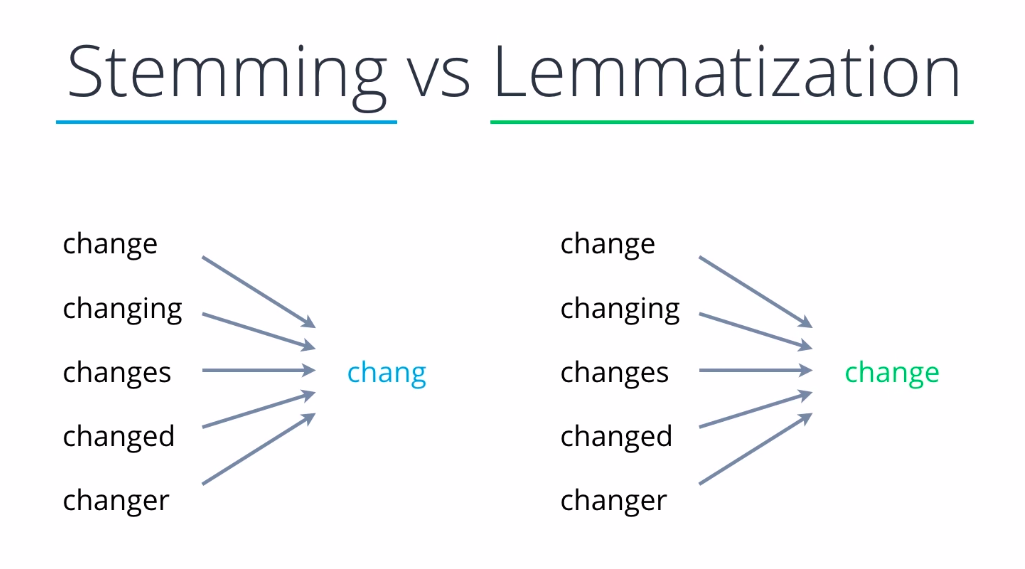

In [38]:
Image("stemming_lemmatization.png" , width=640)

In [39]:
# Text processing pipeline experimentation

# Exclude all non-alphabetical characters
sample_string = re.sub('[^a-zA-Z]', ' ', synth_string_2)
# Lower case all the characters
sample_string = sample_string.lower()
# Split the words
sample_string = sample_string.split()
# Apply stemming
ps = PorterStemmer()
# Remove stopwords - maybe not so useful
sample_string = [ps.stem(word) for word in sample_string if not word in set(stopwords.words('english'))]
sample_string

['content',
 'type',
 'ordershippingbillingview',
 'date',
 'birth',
 'ltv',
 'log',
 'statu',
 'log',
 'membership',
 'purchas',
 'ye',
 'membership',
 'level',
 'gbbpmm',
 'x',
 'membership',
 'statu',
 'non',
 'member',
 'page',
 'type',
 'store',
 'beautypi',
 'uk']

We create an auxiliary function to process a URL section text. We test it against a string feature column.

In [40]:
def process_corpus(df, feature_name) :

  ###########################################################################################################
  """
      This function converts a string feature of a DataFrame into a processed corpus for vectorization.
      --
      In:
          * df: DataFrame containing a string feature.
          * feature_name: Name of the string feature to process.
      Out:
          * query_dict: Data dictionary containing custom variable parameters and their respective values.
  """
  ###########################################################################################################
  corpus = []

  for index, row in df.iterrows():
    string = re.sub('[^a-zA-Z]', ' ', row[feature_name])
    string = string.lower()
    string = string.split()
    ps = PorterStemmer()
    string = [ps.stem(word) for word in string if not word in set(stopwords.words('english'))]
    string = ' '.join(string)
    corpus.append(string)

  return corpus

# Test the function with a string feature column
sample_corpus = process_corpus(df, 'path')
sample_corpus[:20]

['sale order view order id',
 'multiship checkout address',
 'marquag pneu sigl',
 'pneu auto',
 'pneu auto marqu pneu auto michelin primaci',
 'pneu auto marqu pneu auto continent allseasoncontact',
 'bridgeston potenza r pn',
 'pneu auto marqu pneu auto uniroy ms plu',
 'pneu auto marqu pneu auto continent wintercontact ts',
 'continent vanco camper r r pn',
 'pneu auto',
 'michelin primaci r pn',
 'sale order view order id',
 'pneu hiver neig',
 'pneu auto',
 '',
 '',
 'pneu auto',
 'bridgeston battlax bt pro hypersport zr w pn',
 'pneu auto']

With the function used to process the string feature text, we apply the transformations to every of the string feature columns in the DataFrame. For this we define an auxiliary function that can be used in a DataFrame transformation pipeline.

In [41]:
def process_URL_string_features(df) :

  ###########################################################################################################
  """
      This function receives a dataframe containg URL section features and processes their strings for NLP.
      --
      In:
          * df: DataFrame containing a URL section features.
      Out:
          * void - The provided DataFrame is transformed.
  """
  ###########################################################################################################

  # Save the processed string features into section corresponding lists
  path_corpus         = process_corpus(df, 'path')
  query_keys_corpus   = process_corpus(df, 'query_keys')
  query_values_corpus = process_corpus(df, 'query_values')
  cvar_keys_corpus    = process_corpus(df, 'cvar_keys')
  cvar_values_corpus  = process_corpus(df, 'cvar_values')

  # Replace the previous columns with their processed versions
  df['path']         = path_corpus
  df['query_keys']   = query_keys_corpus
  df['query_values'] = query_values_corpus
  df['cvar_keys']    = cvar_keys_corpus
  df['cvar_values']  = cvar_values_corpus


process_URL_string_features(df)

Let's inspect the dataframe with the processed text to ensure correctness.

In [42]:
df.head()

,url,prefix,category_name,path,path_count,query_keys,query_values,query_count,cvar_keys,cvar_values,cvar_count
0,https://www.1001pneus.fr/sales/order/view/orde...,www.1001pneus.fr,other,sale order view order id,5,,,0,currentstor ecomm pagetyp visitorecustom visit...,french fr store view oui log b b,6
1,https://www.1001pneus.fr/multishipping/checkou...,www.1001pneus.fr,checkout,multiship checkout address,3,,,0,currentstor ecomm pagetyp visitorecustom visit...,french fr store view oui log pro grill,6
2,https://www.1001pneus.fr/marquage-pneu-sigles?...,www.1001pneus.fr,other,marquag pneu sigl,1,,,0,currentstor ecomm pagetyp visitorecustom visit...,french fr store view non log gener,6
3,https://www.1001pneus.fr/pneus-auto?diameter=1...,www.1001pneus.fr,search,pneu auto,1,diamet height season b width,saison,4,currentstor ecomm categori ecomm pagetyp visit...,french fr store view pneu auto univers non log...,7
4,https://www.1001pneus.fr/pneus-auto/marques-pn...,www.1001pneus.fr,category,pneu auto marqu pneu auto michelin primaci,4,diamet height load index speed index width,w,5,currentstor ecomm categori ecomm pagetyp visit...,french fr store view pneu auto marqu auto mich...,6


### Corpus Vectorization

In this subsection, the goal is to vectorize the processed corpuses. For this we follow a bag-of-words approach, and over that we can add TF-IDF transformation.

**CountVectorizer** simply counts the number of times a word appears in a document (bag-of-words approach), while **TF-IDF Vectorizer** takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

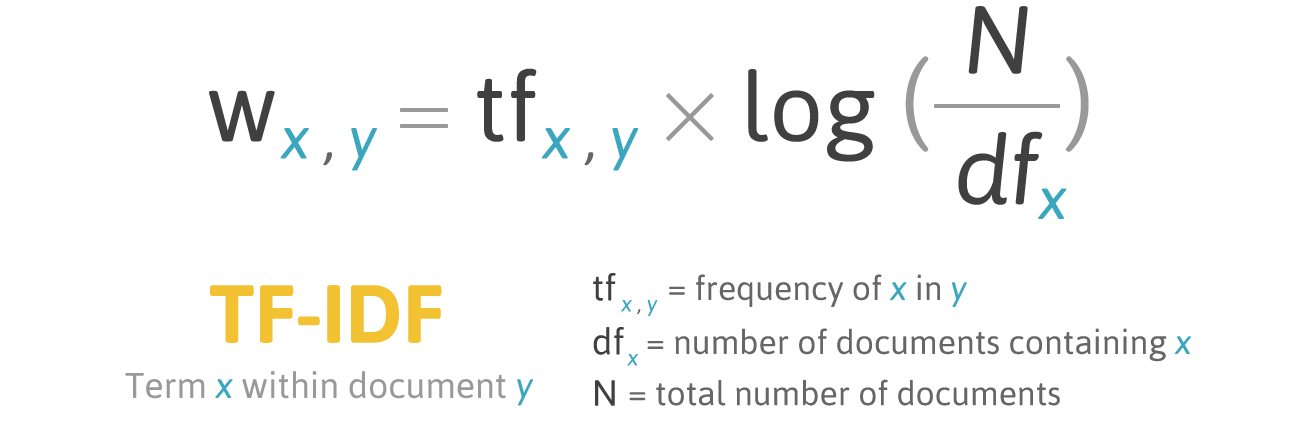

In [43]:
Image("tfidf1.png" , width=640)

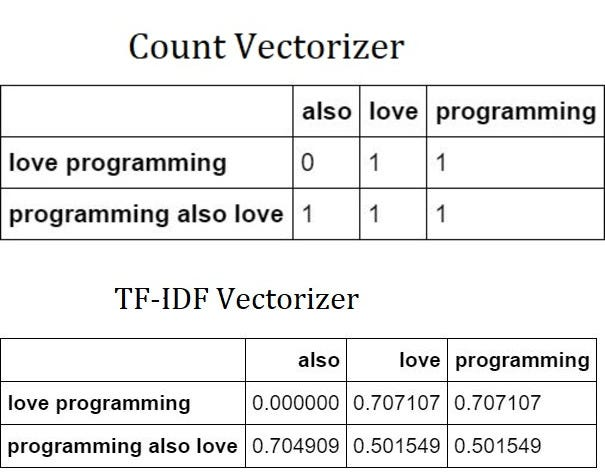

In [44]:
Image("tfidf2.jpg" , width=640)

First, we do some experimentation with the Count Vectorizer. We test it with the path text column.

In [45]:
# Basic Count Vectorizer
cv = CountVectorizer(max_features = 120)

# The custom tokenizer keeps the single character terms
#cv = CountVectorizer(max_features = 120, tokenizer=lambda txt: txt.split())

# Transform the sample string feature column to a matrix
path_vector = cv.fit_transform(df['path']).toarray()

# Get the shape of the vectorized text matrix
print(f'The shape of the vectorized column corpus is: {path_vector.shape}.')

The shape of the vectorized column corpus is: (53406, 120).


In [46]:
# Get the the list of terms sorted by frequency in descending order
sum_words = path_vector.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# Print the first 30 more common terms and their frequency
words_freq[:30]

[('html', 10665),
 ('en', 8023),
 ('fr', 5327),
 ('de', 4740),
 ('us', 4361),
 ('product', 4062),
 ('shop', 3845),
 ('women', 3408),
 ('search', 2884),
 ('men', 2746),
 ('uk', 2302),
 ('checkout', 1785),
 ('gb', 1629),
 ('store', 1467),
 ('sale', 1386),
 ('order', 1221),
 ('black', 1005),
 ('cloth', 996),
 ('et', 990),
 ('watch', 976),
 ('bag', 975),
 ('ca', 917),
 ('cat', 905),
 ('nl', 874),
 ('accessori', 823),
 ('shirt', 820),
 ('aspx', 816),
 ('categori', 798),
 ('shoe', 763),
 ('new', 722)]

We define a function that will create a feature matrix with all the vectorized text matrices concatenated. It is worth noticing that the cardinality or maximum number of features per each URL section bag-of-words can be tuned by changing the number associated to each section in the list of tuples. We define a maximum of 150 features per URL section for homogeneity, but we are aware that this may not be optimal. Tuning these values may be object of further experimentation.

In [47]:
def vectorize_string_features(df) :

  ###########################################################################################################
  """
      This function receives a DataFrame containg processed URL section features and vectorizes them.
      --
      In:
          * df: DataFrame containing a processed URL section features.
      Out:
          * string_feature_matrix - Matrix containing all the vectorized features merged.
  """
  ###########################################################################################################

  # Define the string features to be added to the feature matrix after vectorization and their maximum number of columns
  #string_columns = ['path', 'query_keys', 'query_values', 'cvar_keys', 'cvar_values']
  string_columns = [('path', 150),
                    ('query_keys', 150),
                    ('query_values', 150),
                    ('cvar_keys', 150),
                    ('cvar_values', 150)]

  # Create an empty feature matrix to append vectorized features (not very optimal hack)
  feature_matrix = np.empty((len(df), 0))

  # For every string feature vectorize and append to general feature matrix
  for col, num_features in string_columns :
    cv = CountVectorizer(max_features = num_features, max_df=0.7)
    #cv = CountVectorizer(max_features = 100, tokenizer=lambda txt: txt.split()) # Include single characters
    current_feature = cv.fit_transform(df[col]).toarray()
    # Add a TF-IDF transformation
    tfidfconverter = TfidfTransformer()
    current_feature = tfidfconverter.fit_transform(current_feature).toarray()
    feature_matrix = np.append(feature_matrix, current_feature, axis=1)

  return feature_matrix

feature_matrix = vectorize_string_features(df)
feature_matrix.shape

(53406, 750)

For the numerical features matrix, we just select the numerical columns directly from the DataFrame and convert them into a numpy matrix.

In [48]:
numerical_features = df.select_dtypes(include='number').values
numerical_features

array([[5, 0, 6],
       [3, 0, 6],
       [1, 0, 6],
       ...,
       [3, 9, 4],
       [3, 0, 4],
       [1, 5, 2]], dtype=int64)

## Classification Modelling

### Process Data for ML

We create a feature matrix *X* and a dependent variable vector *y*.

In [49]:
# Split the Dependent Variable (y) from the Independent Variables (X)

X = np.append(numerical_features, feature_matrix, axis=1) # features matrix 'X'
y = df['category_name'].values                            # dependent variable vector 'y'

In [50]:
# Verify matrix 'X'

print(f'The shape of X is: {X.shape}\n')
X[0:5,:]

The shape of X is: (53406, 753)



array([[5., 0., 6., ..., 0., 0., 0.],
       [3., 0., 6., ..., 0., 0., 0.],
       [1., 0., 6., ..., 0., 0., 0.],
       [1., 4., 7., ..., 0., 0., 0.],
       [4., 5., 6., ..., 0., 0., 0.]])

In [51]:
# Verify vector 'y'

print(f'The shape of y is: {y.shape}\n')
y[0:10]

The shape of y is: (53406,)



array(['other', 'checkout', 'other', 'search', 'category', 'category',
       'product', 'category', 'category', 'product'], dtype=object)

We Label Encode the Dependent Variable.

In [52]:
# Create an instance of the Label Encoder class
le = LabelEncoder()

# Label encode the dependent variable
y = le.fit_transform(y)
print(f'Encoded vector y: {y[0:10]}')

Encoded vector y: [12  3 12 15  2  2 14  2  2 14]


We check the label encoding matchings.

In [53]:
# Get the ordered list of classes according to encodings
page_classes = le.classes_

# Create a dictionary to see the label encoding associations
my_encodings = {l: i for (i, l) in enumerate(page_classes)}
my_encodings

{'brand_image': 0,
 'cart': 1,
 'category': 2,
 'checkout': 3,
 'confirmation': 4,
 'favorites_wishlist': 5,
 'form': 6,
 'hah? something went wrong!!': 7,
 'help_support': 8,
 'home': 9,
 'information_legals': 10,
 'my_account': 11,
 'other': 12,
 'press_news': 13,
 'product': 14,
 'search': 15,
 'store_locator': 16}

### Split for Cross-Validation

Split the Dataset Into the Training Test and Test Set

[Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The Train-Test split follows a stratified approach.

*Stratified train-test split* is a technique used in machine learning to split a dataset into training and testing sets while maintaining the same class distribution or proportion of classes in both sets. This is particularly useful when dealing with imbalanced datasets, where the distribution of classes is unequal.

The stratified train-test split ensures that each class is represented in both the training and testing sets in roughly the same proportion as the original dataset. This helps to ensure that the model is trained and evaluated on representative samples from each class, which can lead to more reliable performance evaluation.

The process of performing a stratified train-test split involves the following steps:

1. Identify the feature column that represents the class labels or target variable.
2. Use the train_test_split function from the scikit-learn library with the parameter `stratify` set to the class labels column.
3. Specify the desired test set size or the proportion of the dataset to be allocated for testing.

In [54]:
# Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

### Feature Scaling

We apply feature scaling to the section count features.

(At the end we only used tree-based algorithms which are quite insensitive to feature scaling, so this section may not be needed. I leave it here in case further testing is done with a gradient descent or distance based algorithm.)

In [55]:
# Create an instance of the StandardScaler class
sc = StandardScaler()

In [56]:
# Check first 5 rows of non-scaled section count features
X_train[:5, :3]

array([[3., 0., 6.],
       [1., 0., 4.],
       [1., 2., 2.],
       [6., 0., 4.],
       [4., 2., 9.]])

In [57]:
# Apply Feature Scaling to all the section count features

# Just fit the training set since we don´t want the test set to be calculated in the mean and std dev
X_train[:, :3] = sc.fit_transform(X_train[:, :3])
X_test[:, :3] = sc.transform(X_test[:, :3])

In [58]:
# Verify first 5 rows of scaled section count featuresof the training set
X_train[:5, :3]

array([[ 0.1187071 , -0.65257275,  0.32008773],
       [-1.05992226, -0.65257275, -0.2477344 ],
       [-1.05992226,  0.01999246, -0.81555654],
       [ 1.88665113, -0.65257275, -0.2477344 ],
       [ 0.70802178,  0.01999246,  1.17182093]])

In [59]:
# Verify first 5 rows of scaled section count features of the test set
X_test[:5, :3]

array([[-1.05992226, -0.31629015, -0.81555654],
       [-0.47060758,  0.35627507, -1.0994676 ],
       [ 0.1187071 , -0.65257275,  0.6039988 ],
       [-0.47060758, -0.31629015,  0.03617667],
       [-0.47060758,  2.0376881 ,  0.03617667]])

### Pre-modeling Analysis

We check the final dimensions of the feature matrix that will be used for training.

In [60]:
# Get the shape of the fully encoded matrix
print(f'The fully encoded feature matrix has {X_train.shape[1]} features and {X_train.shape[0]} instances.')

The fully encoded feature matrix has 753 features and 42724 instances.


The feature matrices used for predictive analysis look as the following.

In [61]:
# Print the first 3 rows of the training set feature matrix
X_train[0:3,:]

array([[ 0.1187071 , -0.65257275,  0.32008773, ...,  0.        ,
         0.        ,  0.        ],
       [-1.05992226, -0.65257275, -0.2477344 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.05992226,  0.01999246, -0.81555654, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
# Print the first 3 rows of the test set feature matrix
X_test[0:3,:]

array([[-1.05992226, -0.31629015, -0.81555654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47060758,  0.35627507, -1.0994676 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1187071 , -0.65257275,  0.6039988 , ...,  0.        ,
         0.        ,  0.        ]])

Given the final fully processed feature matrix with the dimensions stated above, we can proceed to do predictive analysis in the next section.

Before modelling, an auxiliary function is defined to print more efficiently some significant performance metrics for the classification task.

[Classification Metrics Documentation](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#989c)

In [63]:
###########################################################################################################
"""
    This function prints a summary of relevant performance metrics for the challenge's classification task.
    --
    In:
        * y_test: Dependent variable labels for the test set.
        * y_pred: Predicted values for the dependent variables.
    Out:
        * void
"""
###########################################################################################################

def evaluate_classifier(y_test, y_pred) :

  # Set display names to match the predicted variable 'category_name' labels
  target_names = page_classes

  # Print a Classification report with several relevant metric scores per label
  print('Performance metrics summary:\n')
  print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

  # Display the Confusion Matrix
  print('Confusion Matrix:\n')
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
  plt.show()

### Tree-Based Predictors

In this subsection we will test first a Decision Tree as a base learner model.

Afterwards, an ensemble method based on the base learner will be evaluated to check for improvements in performance.

These predictors (baseline and ensemble) were chosen since they can help when dealing with an imbalanced predicted class.

* In Decision Trees you can set the `class_weight` parameter to give more weight to the minority classes.
* In Random Forest you can also set the `class_weight` parameter to give more weight to the minority classes.

#### Decision Tree Classifier

[Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Grid search parameter experimentation. (Commented after finding best results)

In [64]:
# # Create a Decision Tree Classifier
# dt_classifier = DecisionTreeClassifier(random_state = 0)

# # Define a parameter grid for the grid search
# dt_param_grid = {
#     'criterion': ["gini", "entropy"],
#     'max_features':["sqrt", "log2", None],
#     'class_weight': ["balanced", None]}

# # Perform grid search
# dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5)
# dt_grid_search.fit(X_train, y_train)
# print(f'Best parameters found:\n{dt_grid_search.best_params_}\n')

# # Predict 'y'
# y_pred = dt_grid_search.predict(X_test)

# # Evaluate its performance
# evaluate_classifier(y_test, y_pred)

After the grid search, the best parameters found are:

`{'class_weight': None, 'criterion': 'gini', 'max_features': None}`

So now we train directly a single ensemble model with the best found parameters.

Performance metrics summary:

                             precision    recall  f1-score   support

                brand_image      0.810     0.736     0.771        87
                       cart      0.896     0.920     0.908       348
                   category      0.946     0.954     0.950      2793
                   checkout      0.921     0.911     0.916       372
               confirmation      0.923     0.966     0.944       149
         favorites_wishlist      0.767     0.885     0.821        26
                       form      0.731     0.543     0.623        35
hah? something went wrong!!      0.000     0.000     0.000        54
               help_support      0.919     0.798     0.854       114
                       home      0.965     0.957     0.961       740
         information_legals      0.543     0.521     0.532        48
                 my_account      0.859     0.880     0.869       382
                      other      0.721     0.682     0.701       390
   

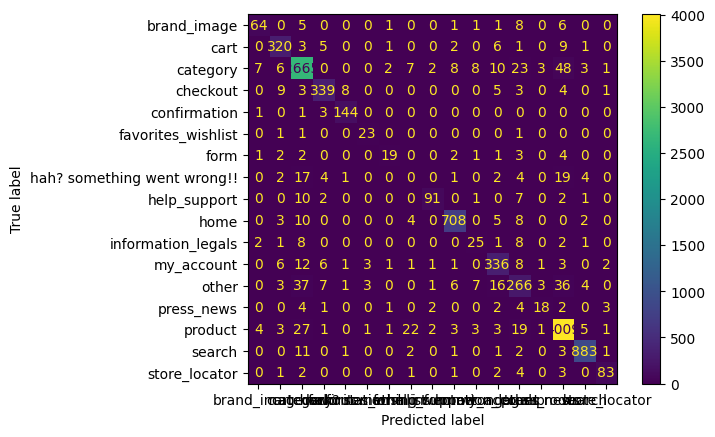

In [65]:
# Create a Decision Tree Classifier, fit the training data and predict 'y'
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

#### Random Forest Classifier

[Random Forest Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Grid search parameter experimentation. (Commented after finding best results)

In [66]:
# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0)

# # Define a parameter grid for the grid search
# rf_param_grid = {
#     'n_estimators': [30, 50, 90, 120, 150],
#     #'max_depth' : [5, 10, 15, None],
#     #'max_features':["sqrt", "log2"],
#     'criterion': ["gini", "entropy"],
#     'class_weight': [None, "balanced", "balanced_subsample"]}

# # Perform grid search
# rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5)
# rf_grid_search.fit(X_train, y_train)
# print(f'Best parameters found:\n{rf_grid_search.best_params_}\n')

# # Predict 'y'
# y_pred = rf_grid_search.predict(X_test)

# # Evaluate its performance
# evaluate_classifier(y_test, y_pred)

After the grid search, the best parameters found are:

`{'class_weight': None, 'criterion': 'gini', 'n_estimators': 120}`

So now we train directly a single ensemble model with the best found parameters.

Performance metrics summary:

                             precision    recall  f1-score   support

                brand_image      0.867     0.747     0.802        87
                       cart      0.929     0.905     0.917       348
                   category      0.945     0.966     0.956      2793
                   checkout      0.934     0.952     0.943       372
               confirmation      0.960     0.973     0.967       149
         favorites_wishlist      0.889     0.923     0.906        26
                       form      0.947     0.514     0.667        35
hah? something went wrong!!      0.000     0.000     0.000        54
               help_support      0.913     0.825     0.866       114
                       home      0.965     0.964     0.964       740
         information_legals      0.765     0.542     0.634        48
                 my_account      0.902     0.911     0.906       382
                      other      0.775     0.679     0.724       390
   

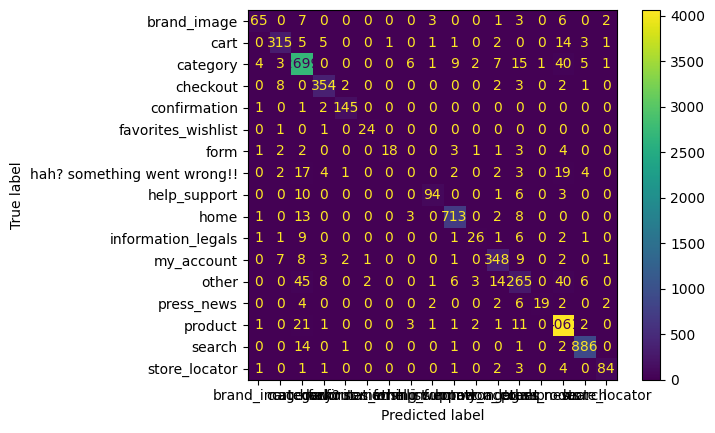

In [67]:
# Create a Random Forest Classifier, fit the training data and predict 'y'
rf_classifier = RandomForestClassifier(n_estimators = 120, criterion = 'gini', random_state = 0) # 50 for 100 feature per section
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

The best performant model yields a **macro average F1-score** of **81%** and a **weighted average F1-score** of **94.4%**. Its **accuracy** is of **94.7%**, however it is important to consider that accuracy is a extremely unrealible metric in this case where the dependent variable classes are very unbalanced. Overall, the results seem quite decent considering we are only modelling with one base predictor and the tuning and data preprocessing could be much more delicate and better reviewed given more development time.

The model shows poor performance (all ≈65% F1-score) for the *form*, *legal information* and *press news* categories. This could probably be explained given the fact that these are some of the features with lowest support. Although, not the lowest one since surprisingly the *favorites wishlist* category can reach 90.6% F1-score while being the less sampled category.

However, the worst performant category is the *error* category by far, being unable to predict correctly even a single instance. The model rarely predicts an instance as an *error*, but when it does, it results to be mostly the *category* label (*home* and *product* categories in a minor degree). Further study could turn this case (since we are dealing with an error label) into an anomaly detection study, where looking for abnormal path level counts peak could be a starting point.

Finally, the most significant cases of mispredictions are the ones associated with the *other* category. A relevant amount of *category* and *product* classes are wrongly predicted to be *other*. Also, there is a considerable amount of *category* instances wrongly predicted as *product*. Misclassifications between *product* and *category* seem to be common overall.

## Concluding Remarks

In this challenge the goal was to solve a multiclass classification problem. The training dataset consisted of web page URLs with associated page category labels.

Engineered features consisted of 2 main groups:

1. URL section parameters count.
2. URL section vectorized parameters using a bag of words approach and a TF-IDF transformation.

The data transformation pipeline also used general data preprocessing approaches such as deletion of duplicated instances and handling missing values (completion upon a URL column information in the case of missing prefixes and deletion otherwise).

The ML algortihm section aimed to iterate on a single type of predictor due to development time constraints. The chosen predictor was a Decision Tree model as base learner in addition to a bagging ensemble method in the form of a Random forest classifier.

Techniques for handling unbalanced datasets such as stratified train/test split and class weighting were evaluated.

The best performant model was a Random Forest Classifier with 120 estimators and gini impurity criterion. Class weighting did not seem to improve the model performance. Its **macro average F1-score** was of **81%**. Its accuracy was of 94.7%, however it is important to consider that accuracy is a extremely unrealible metric in this case where the dependent variable classes are very unbalanced.

Further work on this classification approach may include more advanced imbalanced classes handling techniques, such as undersampling, oversampling (SMOTE) or generation of synthetic samples and testing more models, such as ensemble methods with other base learners and neural network classifiers along with more robust and extensive hyperparameter tuning processes. Also the evaluation of lemmatization and the usage of user defined vocabularies for the bag-of-words rather than using term frequency could be explored for the text processing.
